In [ ]:
#env=research

### references
- https://www.kaggle.com/code/fareselmenshawii/linear-regression-from-scratch

### notes
- Linear regression is about predicting continuous value given input features.
- find slope (w) and intercept (b) that minimize the error between predicted and actual values

### linear regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [17]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

w = np.random.randn()
b = np.random.randn()

learning_rate = 1e-3
epochs = 10000

Epoch: 0, Loss: 76.0906, w: -0.3869, b: -0.8472
Epoch: 100, Loss: 32.2164, w: 1.1713, b: 0.5166
Epoch: 200, Loss: 14.1702, w: 2.1564, b: 1.4072
Epoch: 300, Loss: 6.7358, w: 2.7748, b: 1.9939
Epoch: 400, Loss: 3.6622, w: 3.1586, b: 2.3853
Epoch: 500, Loss: 2.3813, w: 3.3924, b: 2.6510
Epoch: 600, Loss: 1.8382, w: 3.5305, b: 2.8356
Epoch: 700, Loss: 1.5993, w: 3.6078, b: 2.9676
Epoch: 800, Loss: 1.4865, w: 3.6463, b: 3.0656
Epoch: 900, Loss: 1.4265, w: 3.6606, b: 3.1412
Epoch: 1000, Loss: 1.3892, w: 3.6595, b: 3.2020
Epoch: 1100, Loss: 1.3620, w: 3.6490, b: 3.2530
Epoch: 1200, Loss: 1.3398, w: 3.6329, b: 3.2971
Epoch: 1300, Loss: 1.3204, w: 3.6134, b: 3.3365
Epoch: 1400, Loss: 1.3029, w: 3.5921, b: 3.3725
Epoch: 1500, Loss: 1.2868, w: 3.5699, b: 3.4060
Epoch: 1600, Loss: 1.2719, w: 3.5476, b: 3.4374
Epoch: 1700, Loss: 1.2581, w: 3.5253, b: 3.4671
Epoch: 1800, Loss: 1.2453, w: 3.5034, b: 3.4955
Epoch: 1900, Loss: 1.2333, w: 3.4820, b: 3.5226
Epoch: 2000, Loss: 1.2222, w: 3.4612, b: 3.5487

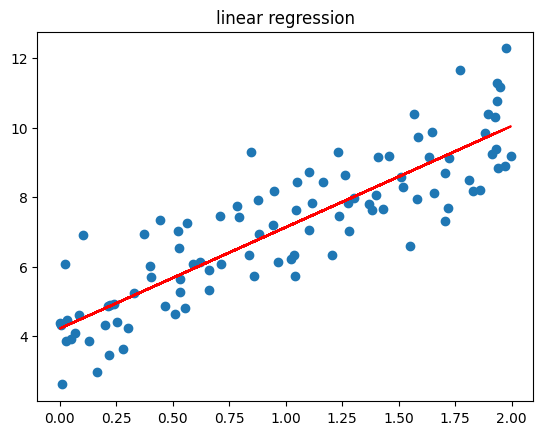

In [18]:
for epoch in range(epochs):
    y_pred = w * X + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    
    dw = np.mean(2 * error * X)
    db = np.mean(2 * error)
    
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    if epoch%100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.4f}, w: {w:.4f}, b: {b:.4f}")
        
   
plt.scatter(X, y)
plt.plot(X, w*X + b, color='red')
plt.title("linear regression")
plt.show()

### multivariate linear regression

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

np.random.seed(0)

- 10 data points
- 2 features: x_1, x_2
- y = 3*x_1 + 2*x_2 + 4 + noise

In [2]:
X = np.random.rand(10, 2) # 10 samples, 2 features

true_weights = np.array([3.0, 2.0])
true_bias = 4.0
noise = np.random.randn(10) * 0.1

y = true_bias + X @ true_weights + noise

In [3]:
df = pd.DataFrame(X, columns=["X1", "X2"])
df["y"] = y

X_augmented = np.hstack([X, np.ones((X.shape[0], 1))])
weights = np.random.randn(3) # 2 weights, 1 bias

lr = 0.1
epochs = 1000

In [4]:
for epoch in range(epochs):
    y_pred = X_augmented @ weights
    error = y_pred - y
    loss = np.mean(error ** 2)
    
    grad = 2 * X_augmented.T @ error / len(y)
    weights = weights - lr * grad
    
    if epoch%100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.4f}, w: {weights}")
        

print(f"learned weights: {weights}")

df["y_pred"] = X_augmented @ weights

fig = px.scatter(df, x="y", y="y_pred", title="actual vs predicted")
fig.add_shape(type="line", x0=df["y"].min(), x1=df["y"].max(), y0=df["y"].min(), y1=df["y"].max(), line=dict(color="red", dash="dash"))
fig.update_layout(xaxis_title="y", yaxis_title="predicted")
fig.show()
    

Epoch: 0, Loss: 30.2880, w: [0.655289   0.54125599 2.61444353]
Epoch: 100, Loss: 0.0195, w: [2.47077786 2.02846132 4.26766916]
Epoch: 200, Loss: 0.0118, w: [2.65525875 2.12185144 4.10396302]
Epoch: 300, Loss: 0.0107, w: [2.70964076 2.17472835 4.03874861]
Epoch: 400, Loss: 0.0105, w: [2.72706408 2.2004885  4.01195501]
Epoch: 500, Loss: 0.0105, w: [2.73313075 2.21228122 4.00073702]
Epoch: 600, Loss: 0.0105, w: [2.7353982  2.21752045 3.99598789]
Epoch: 700, Loss: 0.0105, w: [2.73629136 2.2198124  3.99396453]
Epoch: 800, Loss: 0.0105, w: [2.73665571 2.22080681 3.99309937]
Epoch: 900, Loss: 0.0105, w: [2.73680761 2.22123631 3.99272869]
learned weights: [2.73687135 2.22142018 3.99257071]


### using class

In [2]:
import pickle
import numpy as np
import pandas as pd
from typing import Optional
import plotly.express as px

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

px.scatter(x=train_data["x"] , y=train_data["y"], title="actual data", template="seaborn")

In [5]:
x_train, y_train = train_data["x"].values, train_data["y"].values
x_test, y_test = test_data["x"].values, test_data["y"].values
print(x_train.shape, x_test.shape)

# option 1: manual standardize and reshape
def standardize(x_train, x_test):
    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std
    return x_train, x_test
x_train, x_test = standardize(x_train, x_test)
print(x_train.shape, x_test.shape)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1) # standardize based on train data's mean and std
print(x_train.shape, x_test.shape)

# # option 2: sklearn standardize 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train.reshape(-1, 1))
# x_test = scaler.transform(x_test.reshape(-1, 1))
# print(x_train.shape, x_test.shape)

(699,) (300,)
(699,) (300,)
(699, 1) (300, 1)


In [6]:
class LinearRegression:
    def __init__(self, lr: float, convergence_tolerance: float, loss_metric: str):
        self.lr = lr
        self.convergence_tolerance = convergence_tolerance
        self.W: Optional[np.ndarray] = None
        self.b: float = None
        self.loss_metric = loss_metric
    
    def initialize_parameters(self, n_features: int):
        self.W = np.random.randn(n_features) * 0.01
        self.b = 0.0
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self.W) + self.b
    
    def compute_loss(self, y_pred: np.ndarray, y_true: np.ndarray) -> float:
        if self.loss_metric == "mse":
            return np.mean(np.square(y_pred - y_true))/2
        elif self.loss_metric == "mae":
            return np.mean(np.abs(y_pred - y_true))
        elif self.loss_metric == "rmse":
            return np.sqrt(np.mean(np.square(y_pred - y_true)))
        elif self.loss_metric == "r2":
            return 1 - np.sum(np.square(y_pred - y_true)) / np.sum(np.square(y_true - np.mean(y_true)))
        else:
            raise ValueError(f"Unknown loss metric: {self.loss_metric}")
            
    
    def compute_gradients(self, x: np.ndarray, y_pred: np.ndarray, y_true: np.ndarray):
        n = len(y_true)
        w_grad = np.dot(y_pred - y_true, x) / n
        b_grad = np.sum(y_pred - y_true) / n
        return w_grad, b_grad
        
    def fit(self, x: np.ndarray, y: np.ndarray, epochs: int, plot_loss: bool = True):
        self.initialize_parameters(n_features=x.shape[1])
        loss_history = []
        
        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = self.compute_loss(y_pred, y)
            w_grad, b_grad = self.compute_gradients(x, y_pred, y)
            
            self.W -= self.lr * w_grad
            self.b -= self.lr * b_grad
            loss_history.append(loss)
            
            if epoch%100 == 0:
                print(f"Epoch: {epoch}, Loss: {loss:.6f}")
                
            if epoch>0 and abs(loss_history[-1] - loss_history[-2]) < self.convergence_tolerance:
                print(f"converged at epoch {epoch} with loss {loss:.6f}")
                break
        
        if plot_loss:
            fig = px.line(y=loss_history, title="loss vs epochs", template="seaborn")
            fig.update_layout(
                xaxis_title="epochs",
                yaxis_title="loss"
            )
            fig.show()
        
    def predict(self, x: np.ndarray) -> np.ndarray:
        return self.forward(x)
    
    def save_model(self, fname: str):
        model_data = {
            "learning_rate": self.lr,
            "convergence_tolerance": self.convergence_tolerance,
            "weights": self.W,
            "bias": self.b,
            "loss_metric": self.loss_metric
        }
        
        with open(fname, "wb") as f:
            pickle.dump(model_data, f)
    
    @classmethod
    def load_model(cls, fname: str):
        with open(fname, "rb") as f:
            model_data = pickle.load(f)
        
        model = cls(model_data["learning_rate"], model_data["convergence_tolerance"], model_data["loss_metric"])
        model.W = model_data["weights"]
        model.b = model_data["bias"]
        
        return model

lr = LinearRegression(lr=0.01, convergence_tolerance=1e-6, loss_metric="rmse")
lr.fit(x_train, y_train, epochs=1000)      

Epoch: 0, Loss: 57.793635
Epoch: 100, Loss: 21.314777
Epoch: 200, Loss: 8.226982
Epoch: 300, Loss: 3.985199
Epoch: 400, Loss: 2.990230
Epoch: 500, Loss: 2.830479
Epoch: 600, Loss: 2.808385
Epoch: 700, Loss: 2.805412
Epoch: 800, Loss: 2.805013
converged at epoch 812 with loss 2.805000


In [7]:
lr.save_model("lr_model.pkl")

In [8]:
class RegressionMetrics:
    @staticmethod
    def mean_squared_error(y_true, y_pred):
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mse = np.mean((y_true - y_pred) ** 2)
        return mse

    @staticmethod
    def root_mean_squared_error(y_true, y_pred):
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mse = RegressionMetrics.mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        return rmse

    @staticmethod
    def r_squared(y_true, y_pred):
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [9]:
model = LinearRegression.load_model("lr_model.pkl")
y_pred = model.predict(x_test)

mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_value}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"R-squared (Coefficient of Determination): {r_squared_value}")

Mean Squared Error (MSE): 9.449305483325524
Root Mean Squared Error (RMSE): 3.0739722645667324
R-squared (Coefficient of Determination): 0.9887819945534816
